In [1]:
import math
import random as rand
import numpy as np
from typing import Callable , Tuple, List
import matplotlib.pyplot as plt
from numba import njit
from numba.typed import List

In [2]:
@njit
def footman(arr: np.ndarray, sorted_arr: np.ndarray) -> int:
    return np.sum(np.abs(arr - sorted_arr))

In [3]:
@njit
def bubble_1(arr: np.ndarray) -> tuple:
    n = len(arr)
    sorted_order = np.arange(n)
    scores = List()          
    scores.append(footman(arr, np.arange(n)))

    for _ in range(n - 1):
        for j in range(n - 1):
            scores.append(footman(arr, sorted_order))
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]

    return scores

In [4]:
@njit
def bubble_2(arr: np.ndarray) -> tuple:
    n = len(arr)
    sorted_order = np.arange(n)
    scores = List()          
    scores.append(footman(arr, np.arange(n)))
    swapped = True

    while swapped:
        swapped = False
        for j in range(n - 1):
            scores.append(footman(arr, sorted_order))
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                swapped = True
        n -= 1

    return scores



In [5]:
@njit
def bubble_3(arr: np.ndarray) -> tuple:
    n = len(arr)
    sorted_order = np.arange(n)
    scores = List()          
    scores.append(footman(arr, np.arange(n)))
    swapped = True

    while swapped:
        swapped = False
        for j in range(n - 1):
            scores.append(footman(arr, sorted_order))
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                swapped = True
        n -= 1

    return scores


In [6]:
@njit
def bubble_4(arr: np.ndarray) -> tuple:
    n = len(arr)
    sorted_order = np.arange(n)
    scores = List()          
    scores.append(footman(arr, np.arange(n)))
    swapped = True
    while swapped:
        swapped = False
        new_n = 0
        for j in range(n - 1):
            first_num = arr[j]
            second_num = arr[j + 1]
            scores.append(footman(arr, sorted_order))
            if first_num > second_num:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                swapped = True
                new_n = j
        n = new_n + 1
    return scores

In [7]:
def sim(iter: int, arr_size: int, seed:int = 10, sort_func: Callable = None) -> np.ndarray:
    rand.seed(seed)
    scores_of_scores = []

    for _ in range(iter):
        l = np.arange(arr_size)
        rand.shuffle(l)
        scores = sort_func(l.copy())
        scores_of_scores.append(scores)

    max_len = max(len(s) for s in scores_of_scores)
    padded_scores = np.array([
        np.pad(s, (0, max_len - len(s)), 'edge') for s in scores_of_scores
    ])

    return padded_scores

In [8]:
def plot_algorithms(
    functions: List[Callable],
    names: List[str],
    iter: int,
    arr_size: int,
    seed: int = 10
):
    assert len(functions) == len(names), "Each function must have a corresponding name"

    colors = ['blue', 'green', 'red', 'purple', 'orange']

    for i, func in enumerate(functions):
        scores = sim(iter, arr_size, seed=seed, sort_func=func)
        mean_scores = np.mean(scores, axis=0)
        std_scores = np.std(scores, axis=0)
        steps = np.arange(len(mean_scores))

        # ±3 std deviation band
        lower = mean_scores - 3 * std_scores
        upper = mean_scores + 3 * std_scores

        # Confidence band
        plt.fill_between(
            steps,
            lower,
            upper,
            color=colors[i % len(colors)],
            alpha=0.2
        )

        # Mean line
        plt.plot(
            steps,
            mean_scores,
            color=colors[i % len(colors)],
            label=f'{names[i]} (mean ± 3σ)'
        )

    plt.xlabel('Sorting Step')
    plt.ylabel('Score')
    plt.title('Sorting Algorithms Comparison (±3 std bands)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('plot.png')
    plt.show()


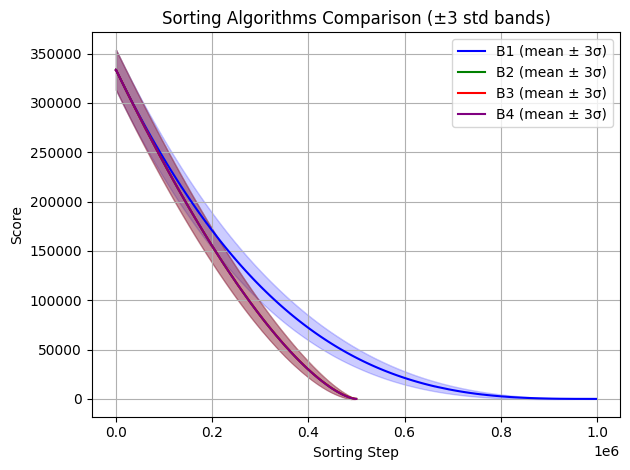

In [9]:
# scores, states = sim(500, 100, seed=10, sort_func=bubble_1)
plot_algorithms([bubble_1,bubble_2, bubble_3, bubble_4], 
                ["B1" , "B2" , "B3" , "B4"],
                500,1000)

In [10]:
# scores, states = sim(500, 100, seed=10, sort_func=bubble_2)
# plot_confidence_bands(scores)

In [11]:
# scores, states = sim(500, 100, seed=10, sort_func=bubble_3)
# plot_confidence_bands(scores)

In [12]:
# scores, states = sim(500, 100, seed=10, sort_func=bubble_4)
# plot_confidence_bands(scores)